# Numerical Solutions for the Bethe Equations

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

/tmp/ipykernel_1542/3156728878.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [2]:
coeff = [1, 0, -1]
sol = np.roots(coeff)
print(sol)

[-1.  1.]


## Defining the constant coefficient

In [3]:
def c1(z1, z2, d):
    return -(1 + z1*z2 - d*z2)/(1+ z1*z2 - d*z1)

def c2(z1, z2, d):
    return -(1 + z1*z2 - d*z1)/(1+z1*z2 - d*z2)

In [4]:
c1(2, 3, 4)

-5.0

In [5]:
c2(2,3,4)

-0.2

In [6]:
c1(2, 3, 4)*c2(2, 3, 4)

1.0

## Defining the polynomial

In [7]:
def pol_coeff1(l, z1, z2, d):
    coeff = [1]
    for i in range(l-1):
        coeff.append(0)
    coeff.append(-c1(z1, z2, d))
    return coeff

In [8]:
pol_coeff1(5, 2, 3, 4)
np.roots(pol_coeff1(5, 2, 3, 4))

array([-1.37972966+0.j        , -0.42635991+1.31220089j,
       -0.42635991-1.31220089j,  1.11622474+0.81098475j,
        1.11622474-0.81098475j])

In [9]:
def pol_coeff2(l, z1, z2, d):
    coeff = [1]
    for i in range(l-1):
        coeff.append(0)
    coeff.append(-c2(z1, z2, d))
    return coeff

In [10]:
pol_coeff2(5, 2, 3, 4)

[1, 0, 0, 0, 0, 0.2]

In [14]:
pol_coeff2(2, 1, 1, 0)

[1, 0, 1.0]

## Finding close solutions

In [11]:
def close_sol1(l, z1, z2, d, s ):
    sols = np.roots(pol_coeff1(l, z1, z2, d))
    sols = [x-s for x in sols]
    return min(sols, key=np.abs) + s


In [22]:
close_sol1(2, 1j, -1j, 0.1, 1j)

(-0.7071067811865475+0.7071067811865475j)

In [18]:
def close_sol2(l, z1, z2, d, s ):
    sols = np.roots(pol_coeff2(l, z1, z2, d))
    sols = [x-s for x in sols]
    return min(sols, key=np.abs) + s

In [24]:
close_sol2(2, 1j, -1j, 0.1, 1j)

(0.049937616943892205+0.9987523388778446j)

## Setting up a recursion

In [45]:
l=5
sol = np.roots(pol_coeff1(l, 0, 0, 0))
print(sol)
z= [sol[1], sol[2]]
print(z)


[-1.        +0.j         -0.30901699+0.95105652j -0.30901699-0.95105652j
  0.80901699+0.58778525j  0.80901699-0.58778525j]
[(-0.3090169943749479+0.9510565162951541j), (-0.3090169943749479-0.9510565162951541j)]


In [46]:
d=.1
z= [close_sol1(l , z[0], z[1], d, z[0]), close_sol2(l, z[0], z[1], d, z[1])]
print(z)

[(-0.3267637310024073+0.9451060597104359j), (-0.3267637310024073-0.9451060597104359j)]


In [47]:
def sol_sys(l, d, k1, k2, trails):
    sol = np.roots(pol_coeff1(l, 0, 0, 0))
    z = [sol[k1], sol[k2]]
    for i in range(trails):
        z=[close_sol1(l , z[0], z[1], d, z[0]), close_sol2(l, z[0], z[1], d, z[1])]
    return (z[0], z[1])

In [49]:
sol_sys(5, 0.1, 1, 2, 30)

((-0.32663878697185006+0.9451492489789948j),
 (-0.32663878697185006-0.9451492489789948j))

In [50]:
sol_sys(5, 0.1, 0, 1, 30)

((-0.9999079603041348+0.013567273875908836j),
 (-0.32189179677281193+0.9467764631476482j))

In [57]:
sol_sys(5, 10, 0, 1, 30)

((-0.9870096895595821+0.16066073794022018j),
 (-0.4578002094174867+0.8890550985497496j))

## Checking the solution

In [60]:
l=5
d=0.1
k1=1
k2=4
trails=30
z= sol_sys(l, d, k1, k2, trails)
print(z[0]**l - c1(z[0], z[1], d))
print(z[1]**l- c2(z[0], z[1], d))

(1.887379141862766e-15+2.4702462297909733e-15j)
(-1.9984014443252818e-15-9.020562075079397e-16j)


## Checking that all solutions are different

In [71]:
[(i,j) for i in range(l) for j in range(i+1, l)]

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [91]:
l=5
d=.1
trails=300
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
print(all_sol)

[((-0.9999079603041354+0.013567273875908392j), (-0.32189179677281116+0.9467764631476485j)), ((-0.9999079603041354-0.013567273875908392j), (-0.32189179677281116-0.9467764631476485j)), ((-0.9983985257018877+0.05657193541232042j), (0.7744692251227168+0.6326115864713671j)), ((-0.9983985257018877-0.05657193541232042j), (0.7744692251227168-0.6326115864713671j)), ((-0.32189179677281116+0.9467764631476485j), (-0.9999079603041354+0.013567273875908392j)), ((-0.32663878697185006+0.9451492489789948j), (-0.32663878697185006-0.9451492489789948j)), ((-0.3524741247363233+0.935821559588879j), (0.8352196684928063+0.5499164530751616j)), ((-0.33183201408736585+0.9433384940872085j), (0.7946264902430337-0.6070986254341527j)), ((-0.32189179677281116-0.9467764631476485j), (-0.9999079603041354-0.013567273875908392j)), ((-0.32663878697185006-0.9451492489789948j), (-0.32663878697185006+0.9451492489789948j)), ((-0.33183201408736585-0.9433384940872085j), (0.7946264902430337+0.6070986254341527j)), ((-0.352474124736

In [92]:
diff =[abs(x[0]-y[0])+abs(x[1]-y[1]) for x in all_sol for y in all_sol if x != y]
diff.sort()
print(diff)

[1.1765251839191928, 1.1765251839191928, 1.1765251839191928, 1.1765251839191928, 1.1765251839191928, 1.1765251839191928, 1.1765251839191928, 1.1765251839191928, 1.1766164391453575, 1.1766164391453575, 1.1766164391453575, 1.1766164391453575, 1.1766164391453575, 1.1766164391453575, 1.1766164391453575, 1.1766164391453575, 1.179695135498465, 1.179695135498465, 1.179695135498465, 1.179695135498465, 1.179695135498465, 1.179695135498465, 1.179695135498465, 1.179695135498465, 1.1835165927524283, 1.1835165927524283, 1.1835165927524283, 1.1835165927524283, 1.1835165927524283, 1.1835165927524283, 1.1835165927524283, 1.1835165927524283, 1.1936193079196333, 1.1936193079196333, 1.1936193079196333, 1.1936193079196333, 1.1936193079196333, 1.1936193079196333, 1.1936193079196333, 1.1936193079196333, 1.1965970142123497, 1.1965970142123497, 1.1965970142123497, 1.1965970142123497, 1.1965970142123497, 1.1965970142123497, 1.1965970142123497, 1.1965970142123497, 1.2342353623207984, 1.2342353623207984, 1.23423

## Plotting the solutions

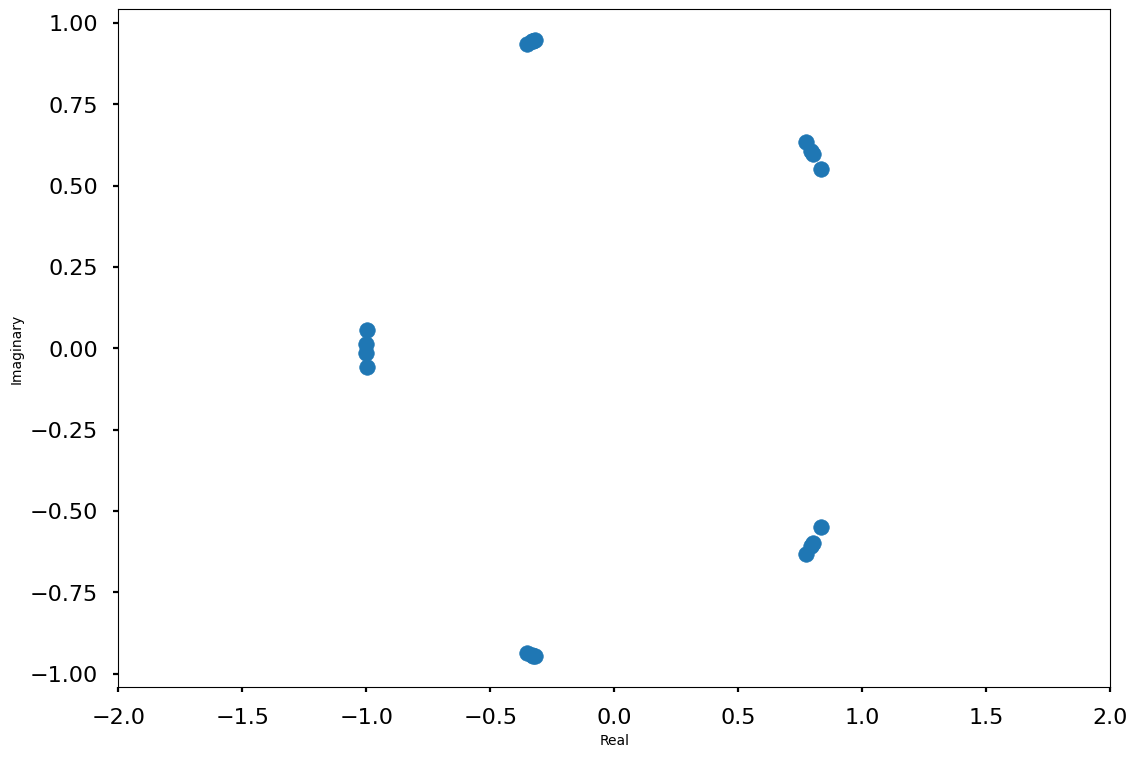

In [93]:
# import library
import matplotlib.pyplot as plt


# extract real part
x = [ele[1].real for ele in all_sol]
# extract imaginary part
y = [ele[1].imag for ele in all_sol]

# plot the complex numbers
plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.xlim([-2,2])
plt.show()


## Arbitrary number of particles